# ДЗ №7 по теме перестройки в геноме
В этом задании предстоит разобраться, на сколько хорошо и в каких пределах, жадный алгоритм подсчета перестановок будет возвращать похожее количество перестановок на то, что было в действительности.

## Симуляция (2 балла)
Будем работать в рамках Random Breakage Model - то есть считать, что разрывы могут происходить в любом месте последовательности. В примере будем пользоваться обозначением синтенных блоков числами, а их ориентацию будем обозначать знаком (+ или -).
Симуляция заключается в следующем:
Нужно взять последовательность чисел от 1 до 1000, после чего проделать в этой последовательности k разворотов (разворот, включает в себя смену знаков). Какие стоит выбирать k, станет понятно в последнем задании.


In [15]:
from random import randrange as rr

def reverse_segment(seq, start, stop):
    seq[start:stop] = seq[start:stop][::-1]
    for i in range(start, stop):
        seq[i] = -seq[i]
    
def create_seq(length, rev_seq_count):
    seq = [i + 1 for i in range(length)]
    for _ in range(rev_seq_count):
        start = rr(length)
        stop = rr(length)
        if start > stop:
            start, stop = stop, start
        reverse_segment(seq, start, stop + 1)
    return seq

Проверка:

In [18]:
print(*create_seq(10, 1))
print(*create_seq(15, 2))
print(*create_seq(20, 3))

1 2 3 4 5 6 7 -9 -8 10
10 11 -3 -2 -1 -9 -8 -7 -6 -5 -4 12 13 14 15
1 2 3 4 5 6 -10 7 8 9 11 12 -20 -19 -18 -17 -16 -15 -14 -13


## Жадный алгоритм сортировки поворотами (2 балла)
Напишите жадный алгоритм сортировки разворотами (см. лекцию), который в качестве ответа возвращает количество операций разворота, которые понадобилось сделать.

In [30]:
def greedy_sort_by_reverse(seq):
    greedy_seq = seq.copy()
    ans = 0
    length = len(greedy_seq)
    
    for i in range(length):
        if greedy_seq[i] == i + 1:
            continue
        
        g = i
        for k in range(i, length):
            if abs(greedy_seq[k]) == i + 1:
                g = k
                break
        reverse_segment(greedy_seq, i, g + 1)
        ans += 1
        if greedy_seq[i] == -(i + 1):
            reverse_segment(greedy_seq, i, i + 1)
            ans += 1
    return ans

Проверка:

In [32]:
sequense = create_seq(15, 3)
print(*sequense)

print(greedy_sort_by_reverse(sequense))

1 2 3 4 9 -8 6 7 -5 10 11 12 13 14 15
3



## Анализ расстояния (4 балла)
Постройте график зависимости расстояния которое возвращает жадный алгоритм от реального расстояния. Проанализируйте, что происходит при небольшом количестве поворотов и когда поворотов сделано очень много.
Определите, при каком количестве поворотов все ломается, например, ответ отличается > чем на 25, причем жадный алгоритм возвращает меньше операций, чем происходит в симмуляции. Чтобы точнее найти количество разворотов, при котором это происходит, повторите симуляцию много раз и постройте распределение этой величины деленной на длину изначальной последовательности (1000).
Постарайтесь объяснить, что происходит.

In [39]:
length = 1000
test, dist_perfect, dist_greed = [], [], []

for k in range(1, 2*length + 1, 25):
    expected = []
    for _ in range(5):
        seq = create_seq(length, k)
        expected.append(greedy_sort_by_reverse(seq))
    mean_greed_ans = sum(expected) / len(expected)
    test.append(k / length)
    dist_perfect.append(k / length)
    dist_greed.append(mean_greed_ans / length)

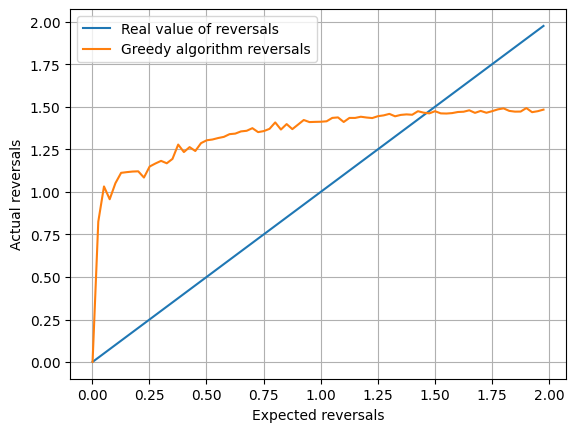

In [40]:
import matplotlib.pyplot as plt

plt.plot(test, dist_perfect)
plt.plot(test, dist_greed)
plt.xlabel("Expected reversals")
plt.ylabel("Actual reversals")

plt.legend(["Real value of reversals", "Greedy algorithm reversals"])
plt.grid(True)
plt.show()

Анализ результатов моделирования:

Мы делаем $k$ разворотов и перестановок в последовательности. В какой-то момент перестановок становится так много, что их можно назвать случайными, а выполняемые алгоритмом развороты добавляют в последовательность еще больше неопределенности. При $k >1000$ (то есть больше длины последовательности) можно говорить, что последовательность абсолютно случайна.

Рассмотрим случайную перестановку, с которой работает жадный алгоритм. Если на каждом шаге $i$ считать, что нахождение элемента на позиции не зависит от его соседей, то нужно $length$ перестановок, чтобы каждый элемент оказался на своем месте. Так же посмотрим на знак у элемента: с вероятностью $\frac{1}{2}$ необходимо пеменять знак у каждого элемента, что в сумме дает $\frac{1}{2}length$ операций. Тогда общее число перестановок и разворотов получается $\frac{3}{2}length$.

Эти выводы подтвержаются моделированием - жадны алгоритм сделал меньше перестановок и разворотов, чем их было на самом деле